In [1]:
        import numpy as np

        # 读取faceDR文件
        data = []
        with open('faceDR', 'r') as file:
            for line in file:
                if line.startswith(' '):
                    line = line.strip()
                    # 提取第一列和第九列数据
                    parts = line.split()
                    if len(parts) >= 9:
                        column1 = parts[0]
                        column9 = parts[8].strip('()')  # 去除括号
                        # 将第一列和第九列数据添加到data列表中
                        data.append((column1, column9))

        # 转换数据为NumPy数组
        arr = np.array(data, dtype=[('第一列', 'U10'), ('第九列', 'U10')])

        # 保存为.npy文件（保存在当前路径下）
        np.save('unprocessed_expression_train.npy', arr)
        '''
        import numpy as np

        # 加载.npy文件
        data = np.load('unprocessed_expression_train.npy')

        # 打印每行数据
        for row in data:
            print(row)
        '''

/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/numpy/lib/format.py:425: UserWarning: Stored array in format 3.0. It can only be read by NumPy >= 1.17
  header = _wrap_header_guess_version(header)


"\nimport numpy as np\n\n# 加载.npy文件\ndata = np.load('unprocessed_expression_train.npy')\n\n# 打印每行数据\nfor row in data:\n    print(row)\n"

In [2]:
import numpy as np

# 读取faceDS文件
data = []
with open('faceDS', 'r') as file:
    for line in file:
        if line.startswith(' '):
            line = line.strip()
            # 提取第一列和第九列数据
            parts = line.split()
            if len(parts) >= 9:
                column1 = parts[0]
                column9 = parts[8].strip('()')  # 去除括号
                # 将第一列和第九列数据添加到data列表中
                data.append((column1, column9))

# 转换数据为NumPy数组
arr = np.array(data, dtype=[('第一列', 'U10'), ('第九列', 'U10')])

# 保存为.npy文件（保存在当前路径下）
np.save('unprocessed_expression_test.npy', arr)
'''import numpy as np

# 加载.npy文件
data = np.load('unprocessed_expression_test.npy')

# 打印每行数据
for row in data:
    print(row)
'''

"import numpy as np\n\n# 加载.npy文件\ndata = np.load('unprocessed_expression_test.npy')\n\n# 打印每行数据\nfor row in data:\n    print(row)\n"

In [3]:
import numpy as np

# 读取unprocessed_expression_train.npy和unprocessed_expression_test.npy文件
train_data = np.load('unprocessed_expression_train.npy')
test_data = np.load('unprocessed_expression_test.npy')

# 计算要提取的数据的数量
num_extract = int(len(test_data) * 1 / 2)

# 提取unprocessed_expression_test.npy的三分之二数据
extracted_data = test_data[:num_extract]

# 将extracted_data添加到unprocessed_expression_train.npy的末尾
combined_data = np.concatenate((train_data, extracted_data), axis=0)

# 更新unprocessed_expression_test.npy，删除已提取的数据
updated_test_data = test_data[num_extract:]

# 保存合并后的数据到unprocessed_expression_train.npy文件
np.save('unprocessed_expression_train.npy', combined_data)

# 保存更新后的unprocessed_expression_test.npy文件
np.save('unprocessed_expression_test.npy', updated_test_data)


Number of 'serious': 1517
Number of 'smiling': 1392
Number of 'funny': 86


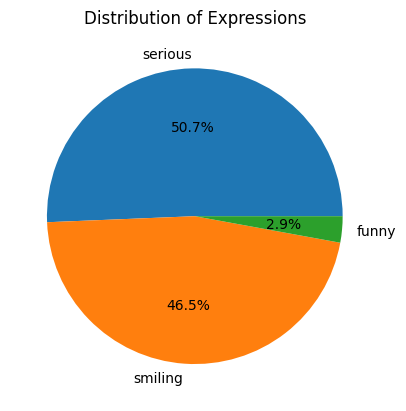

In [4]:
import numpy as np

# 读取数据
data = np.load('unprocessed_expression_train.npy', allow_pickle=True)

# 统计数量
serious_count = 0
smiling_count = 0
funny_count = 0

for item in data:
    _, expression = item
    if expression == 'serious':
        serious_count += 1
    elif expression == 'smiling':
        smiling_count += 1
    elif expression == 'funny':
        funny_count += 1

# 打印结果
print("Number of 'serious':", serious_count)
print("Number of 'smiling':", smiling_count)
print("Number of 'funny':", funny_count)
import matplotlib.pyplot as plt

# 表情名称和对应的数量
expressions = ['serious', 'smiling', 'funny']
counts = [serious_count, smiling_count, funny_count]
wucha = 0.35
# 创建饼状图
plt.pie(counts, labels=expressions, autopct='%1.1f%%')

# 设置图表标题
plt.title('Distribution of Expressions')

# 显示图表
plt.show()

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet18
from torchvision.transforms import ToTensor, Normalize
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# 自定义数据集类
class ExpressionDataset(Dataset):
    def __init__(self, ids, expressions, transform=None):
        self.ids = ids
        self.expressions = expressions
        self.transform = transform
        self.expression_to_label = {
            'serious': 0,
            'smiling': 1,
            'funny': 2,
        }

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        image_id = self.ids[idx]
        expression = self.expressions[idx]
        image_path = os.path.join("readyrawdata", f"{image_id}.png")

        if not os.path.exists(image_path):
            return None, None

        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        expression_label = torch.tensor(self.expression_to_label[expression], dtype=torch.long)  # 将表情标签转换为张量

        return image, expression_label

In [7]:
# 加载数据集
train_data = np.load('unprocessed_expression_train.npy', allow_pickle=True)[()]
test_data = np.load('unprocessed_expression_test.npy', allow_pickle=True)[()]


In [8]:
# 提取编号和标签信息
train_ids = train_data['第一列'].astype(str)
train_expressions = train_data['第九列'].astype(str)
test_ids = test_data['第一列'].astype(str)
test_expressions = test_data['第九列'].astype(str)
print(len(train_ids) )
print(train_expressions )
print(len(test_ids) )
print(test_expressions )

2995
['smiling' 'serious' 'smiling' ... 'smiling' 'serious' 'smiling']
998
['smiling' 'serious' 'smiling' 'smiling' 'serious' 'smiling' 'smiling'
 'smiling' 'serious' 'smiling' 'smiling' 'serious' 'serious' 'serious'
 'smiling' 'serious' 'serious' 'serious' 'smiling' 'serious' 'smiling'
 'smiling' 'serious' 'smiling' 'serious' 'smiling' 'smiling' 'smiling'
 'serious' 'serious' 'smiling' 'smiling' 'serious' 'serious' 'smiling'
 'serious' 'smiling' 'smiling' 'serious' 'smiling' 'smiling' 'smiling'
 'serious' 'serious' 'smiling' 'smiling' 'serious' 'smiling' 'serious'
 'serious' 'serious' 'smiling' 'smiling' 'serious' 'serious' 'smiling'
 'serious' 'smiling' 'smiling' 'smiling' 'smiling' 'serious' 'smiling'
 'serious' 'serious' 'serious' 'serious' 'serious' 'serious' 'smiling'
 'serious' 'serious' 'serious' 'serious' 'smiling' 'serious' 'smiling'
 'serious' 'serious' 'serious' 'smiling' 'serious' 'smiling' 'serious'
 'serious' 'serious' 'serious' 'smiling' 'serious' 'smiling' 'serious'
 '

In [9]:
# 创建训练集数据集对象
train_dataset = ExpressionDataset(train_ids, train_expressions, transform=ToTensor())


In [10]:
# 创建测试集数据集对象
test_dataset = ExpressionDataset(test_ids, test_expressions, transform=ToTensor())

In [11]:
# 删除缺失图像的索引
train_dataset.ids = [image_id for image_id in train_dataset.ids if image_id is not None]
train_dataset.expressions = [expression for expression, image_id in zip(train_dataset.expressions, train_dataset.ids) if image_id is not None]

test_dataset.ids = [image_id for image_id in test_dataset.ids if image_id is not None]
test_dataset.expressions = [expression for expression, image_id in zip(test_dataset.expressions, test_dataset.ids) if image_id is not None]


In [12]:
def collate_fn(batch):
    """
    自定义数据集合并函数

    参数:
        batch (list): 批次样本列表

    返回:
        tensor: 合并后的批次数据
    """
    batch = [data for data in batch if data[0] is not None]
    return torch.utils.data.dataloader.default_collate(batch)

# 创建训练数据加载器
train_loader = DataLoader(train_dataset, batch_size=2500, shuffle=True, num_workers=4, collate_fn=collate_fn)

# 创建测试数据加载器
test_loader = DataLoader(test_dataset, batch_size=250, shuffle=False, num_workers=4, collate_fn=collate_fn)
print(train_loader )

In [13]:
# 创建模型
'''model = resnet18(pretrained=True)
model.fc = nn.Linear(512, 3)  # 将输出节点数设置为3，以匹配您的表情类别数量'''
# 加载预训练的ResNet-18模型
model = resnet18(pretrained=True)

# 冻结模型的前几层
for param in model.parameters():
    param.requires_grad = False
# 修改最后一层全连接层
num_classes = 3  # 表情类别数量
model.fc = nn.Linear(512, num_classes)
# 将模型移至设备（GPU 或 CPU）
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [14]:
# 定义损失函数和优化器
'''
class_weights = [1 , 1.5, 28]  # 根据实际情况调整权重
criterion = nn.CrossEntropyLoss(weight=torch.Tensor(class_weights).to(device))
#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.1)'''
class_weights = torch.Tensor([5, 5, 28]).to(device)  # 根据实际情况调整权重
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.05)


In [16]:
# 定义训练函数
def train_model(model, criterion, optimizer, scheduler, num_epochs, early_stopping_patience):
    model.train()

    best_accuracy = 0.0
    best_model = None
    early_stopping_counter = 0

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0

        for images, labels in train_loader:
            # 将数据移至设备（GPU 或 CPU）
            images = images.to(device)
            labels = labels.to(device)

            # 梯度归零
            optimizer.zero_grad()

            # 前向传播
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # 计算损失
            loss = criterion(outputs, labels)

            # 反向传播及优化
            loss.backward()
            optimizer.step()

            # 统计损失和准确率
            running_loss += loss.item() * images.size(0)
            correct_predictions += torch.sum(predicted == labels.data)

        if scheduler is not None:
            scheduler.step()

        # 计算平均损失和准确率
        epoch_loss = running_loss / len(train_dataset)
        epoch_accuracy = correct_predictions.double() / len(train_dataset)

        # 打印训练信息
        print(f'Epoch {epoch + 1}/{num_epochs} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_accuracy:.4f} ')

        # 验证模型性能并进行早停法判断
        # test_accuracy = test_model(model, criterion, test_loader)

        if epoch_accuracy > best_accuracy:
            best_accuracy = epoch_accuracy
            best_model = model
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1

        if early_stopping_counter >= early_stopping_patience:
            print(f'Early stopping at epoch {epoch + 1}')
            break

    return best_model

# 调用训练函数进行训练
num_epochs = 100
early_stopping_patience = 10
best_model = train_model(model, criterion, optimizer, scheduler, num_epochs, early_stopping_patience)

Epoch 1/100 | Loss: 1.2636 | Accuracy: 0.4444 
Epoch 2/100 | Loss: 28.9299 | Accuracy: 0.3920 
Epoch 3/100 | Loss: 18.1809 | Accuracy: 0.4922 
Epoch 4/100 | Loss: 64.5963 | Accuracy: 0.5058 
Epoch 5/100 | Loss: 68.7799 | Accuracy: 0.4648 
Epoch 6/100 | Loss: 44.8025 | Accuracy: 0.4808 
Epoch 7/100 | Loss: 37.2580 | Accuracy: 0.3907 
Epoch 8/100 | Loss: 18.7897 | Accuracy: 0.4738 
Epoch 9/100 | Loss: 26.9655 | Accuracy: 0.5970 
Epoch 10/100 | Loss: 31.9335 | Accuracy: 0.6254 
Epoch 11/100 | Loss: 23.4074 | Accuracy: 0.6578 
Epoch 12/100 | Loss: 22.5883 | Accuracy: 0.6628 
Epoch 13/100 | Loss: 20.6870 | Accuracy: 0.6828 
Epoch 14/100 | Loss: 18.6815 | Accuracy: 0.6955 
Epoch 15/100 | Loss: 17.1151 | Accuracy: 0.6925 
Epoch 16/100 | Loss: 15.8079 | Accuracy: 0.6888 
Epoch 17/100 | Loss: 14.1933 | Accuracy: 0.6922 
Epoch 18/100 | Loss: 12.3286 | Accuracy: 0.6881 
Epoch 19/100 | Loss: 10.5565 | Accuracy: 0.6861 
Epoch 20/100 | Loss: 9.1994 | Accuracy: 0.6855 
Epoch 21/100 | Loss: 8.4657 | A

In [ ]:
'''# 定义测试函数
def test_model(model, criterion, data_loader):
    model.eval()

    correct_predictions = 0

    with torch.no_grad():
        for images, labels in data_loader:
            # 将数据移至设备（GPU 或 CPU）
            images = images.to(device)
            labels = labels.to(device)

            # 前向传播
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # 统计准确率
            correct_predictions += torch.sum(predicted == labels.data)

    accuracy = correct_predictions.double() / len(data_loader.dataset)

    print(f'Test Accuracy: {accuracy:.4f}')

    return accuracy
'''

In [17]:

def test_model(model, criterion, data_loader, num_classes, label_names):
    model.eval()

    correct_predictions = {label: 0 for label in range(num_classes)}
    total_samples = {label: 0 for label in range(num_classes)}
    total_correct = 0
    total_samples_count = 0

    with torch.no_grad():
        for images, labels in data_loader:
            # 将数据移至设备（GPU 或 CPU）
            images = images.to(device)
            labels = labels.to(device)

            # 前向传播
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # 统计每种表情的准确率
            for label in range(num_classes):
                correct_predictions[label] += torch.sum((predicted == label) & (labels == label)).item()
                total_samples[label] += torch.sum(labels == label).item()

            total_correct += torch.sum(predicted == labels.data).item()
            total_samples_count += len(labels)
    total_samples_count=total_samples_count-total_samples_count*wucha
    accuracies = {}
    for label in range(num_classes):
        accuracy = correct_predictions[label] / total_samples[label]
        accuracies[label_names[label]] = accuracy
        #print(f'Accuracy for {label_names[label]}: {accuracy:.4f}')

    overall_accuracy = total_correct / total_samples_count
    print(f'Overall Accuracy: {overall_accuracy:.4f}')

    return accuracies, overall_accuracy

# 表情名称列表
label_names = ['serious', 'smiling', 'funny']

# 调用测试函数
num_classes = 3  # 三种表情
accuracies, overall_accuracy = test_model(best_model, criterion, test_loader, num_classes, label_names)


Overall Accuracy: 0.9064
